In [54]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay, roc_curve

In [55]:
df = pd.read_csv("../Datasets/Airlines.csv")

In [56]:
df.head(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


In [57]:
df.tail(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539373,539374,B6,480,LAX,BOS,5,1435,320,1
539374,539375,DL,2354,LAX,ATL,5,1435,255,0
539375,539376,FL,58,LAX,ATL,5,1435,250,0
539376,539377,B6,717,JFK,SJU,5,1439,220,1
539377,539378,B6,739,JFK,PSE,5,1439,223,1
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [59]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [60]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.shape

(539383, 9)

In [63]:
perc_delay =  df["Delay"].value_counts()

perc_delay / 539383 * 100



Delay
0    55.455771
1    44.544229
Name: count, dtype: float64

#### Data Cleaning 

In [64]:
clon_df = df.copy()

clon_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [65]:
# Replacing the name of the day of the week with the actual name for EDA
Day_of_week = {1:"Monday",
               2:"Tuesday",
               3:"Wednesday",
               4:"Thursday",
               5:"Friday",
               6:"Saturday",
               7:"Sunday" 
               }
clon_df["Day_Of_Week"]= clon_df["DayOfWeek"].map(Day_of_week)

In [66]:
clon_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday


In [67]:
clon_df["Time_Hours"] = clon_df["Time"]/60

clon_df["Length_Hours"] = clon_df["Length"] / 60

def period(time):
    if time < 720:
        return 'Morning'
    elif  720<= time < 1020:
        return 'Afternoon'
    else:
        return 'Evening'
clon_df['TimePeriod'] = clon_df['Time'].apply(period)

clon_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,Time_Hours,Length_Hours,TimePeriod
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday,0.250000,3.416667,Morning
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday,0.250000,3.700000,Morning
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday,0.333333,2.750000,Morning
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday,0.333333,3.250000,Morning
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday,0.500000,3.366667,Morning


In [68]:
clon_df.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,Time_Hours,Length_Hours,TimePeriod
539378,539379,CO,178,OGG,SNA,5,1439,326,0,Friday,23.983333,5.433333,Evening
539379,539380,FL,398,SEA,ATL,5,1439,305,0,Friday,23.983333,5.083333,Evening
539380,539381,FL,609,SFO,MKE,5,1439,255,0,Friday,23.983333,4.250000,Evening
539381,539382,UA,78,HNL,SFO,5,1439,313,1,Friday,23.983333,5.216667,Evening
539382,539383,US,1442,LAX,PHL,5,1439,301,1,Friday,23.983333,5.016667,Evening


In [69]:
clon_df["Airline"].value_counts()

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64

### Univarate Analysis

In [70]:
clon_df["AirportFrom"].value_counts()

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5876\3074104630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clon_df, x= "Airline", palette="Set2", order=df["Airline"].value_counts().index)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5876\3074104630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clon_df, x="Delay", palette="Set2")


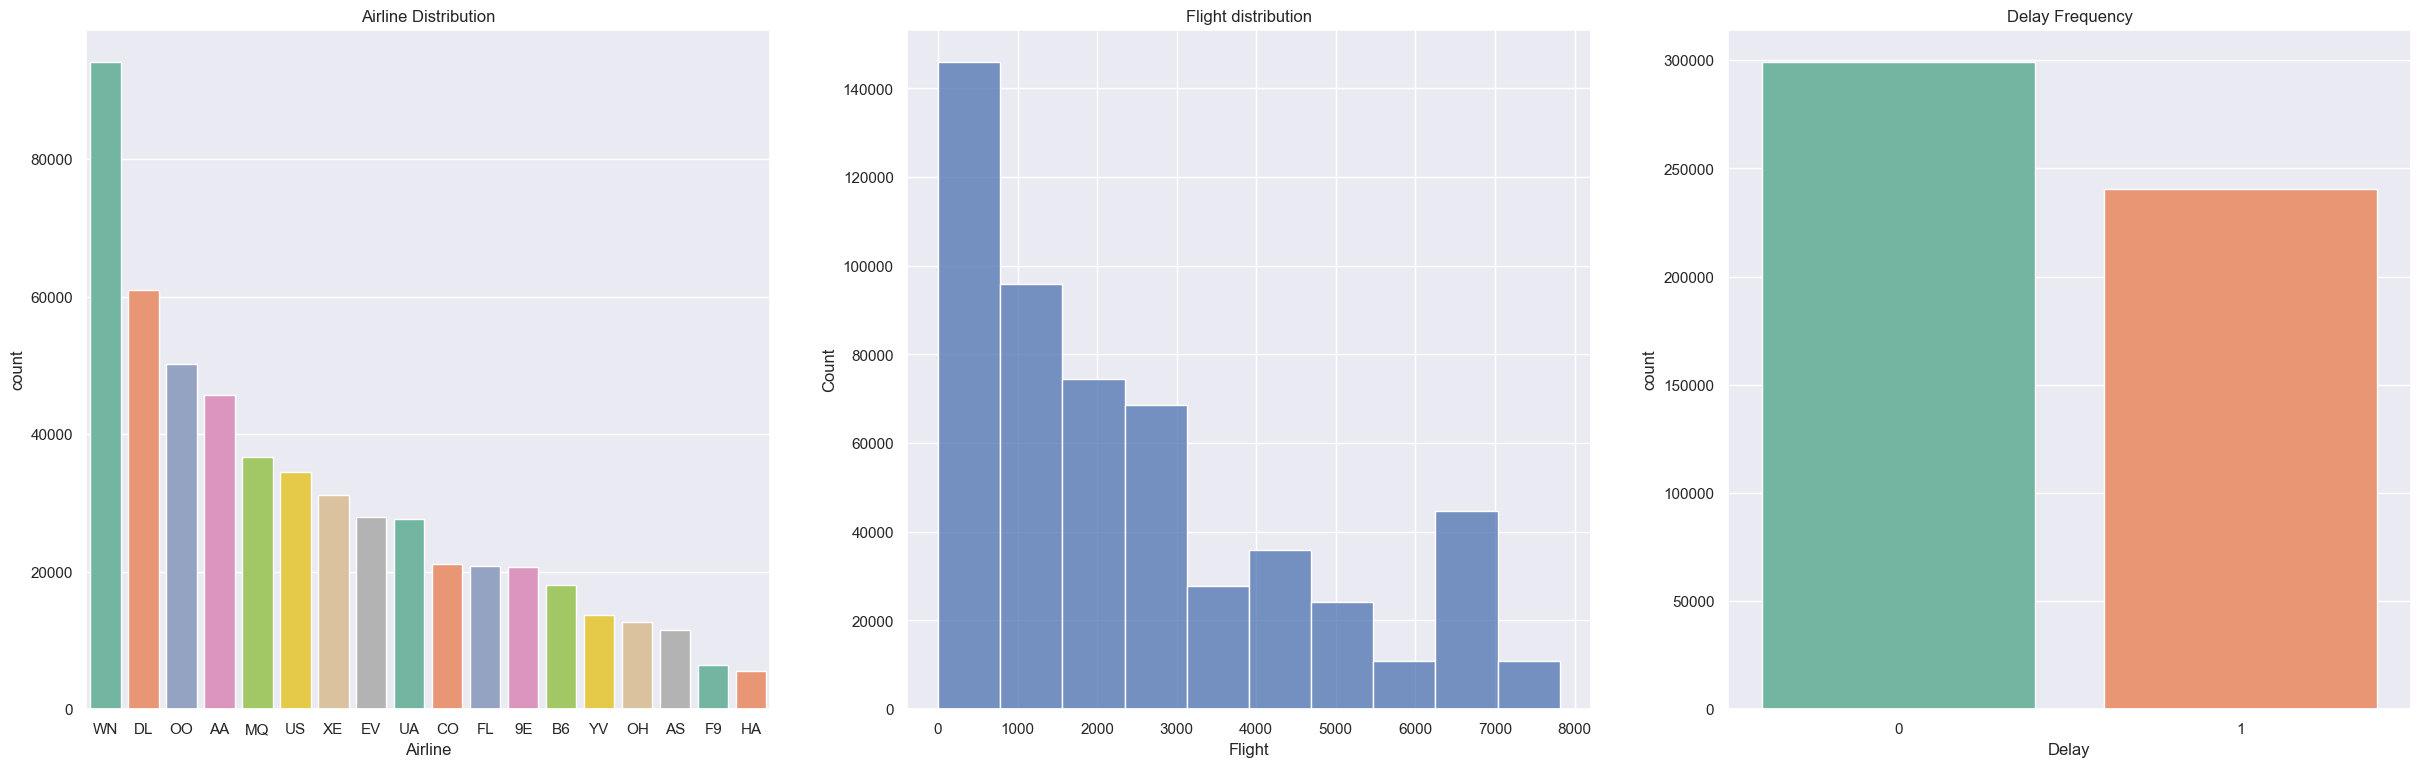

In [71]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.countplot(data=clon_df, x= "Airline", palette="Set2", order=df["Airline"].value_counts().index)
plt.title("Airline Distribution")

plt.subplot(3,3,2)
sns.histplot(clon_df["Flight"], bins= 10)
plt.title("Flight distribution")

plt.subplot(3,3,3)
sns.countplot(data=clon_df, x="Delay", palette="Set2")
plt.title("Delay Frequency")

plt.show()

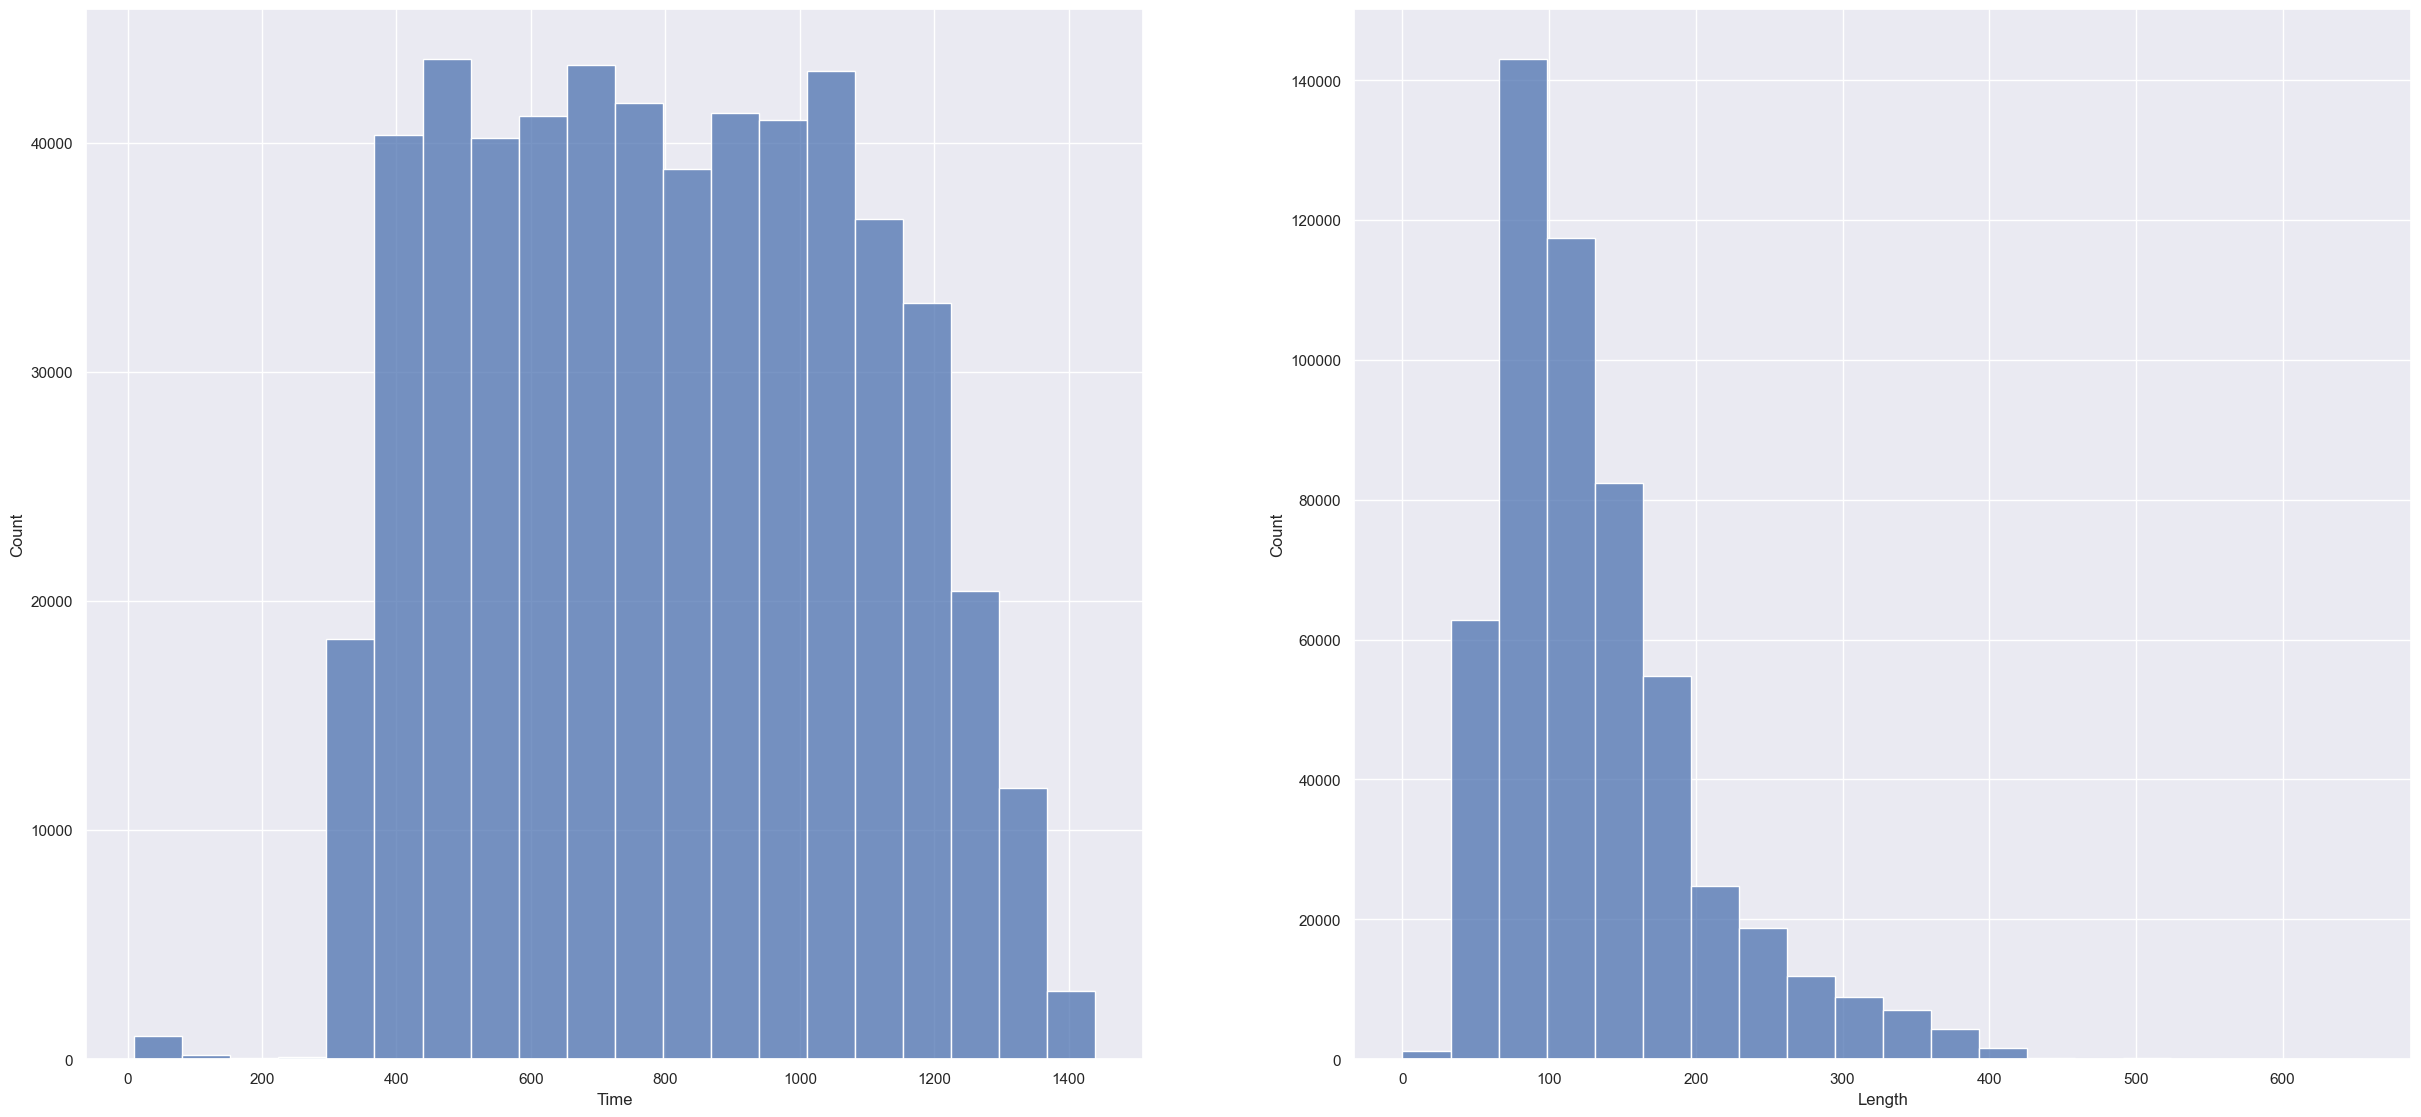

In [72]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
sns.histplot(df["Time"], bins=20)

plt.subplot(2,2,2)
sns.histplot(df["Length"], bins=20)


plt.show()

<Axes: xlabel='Length'>

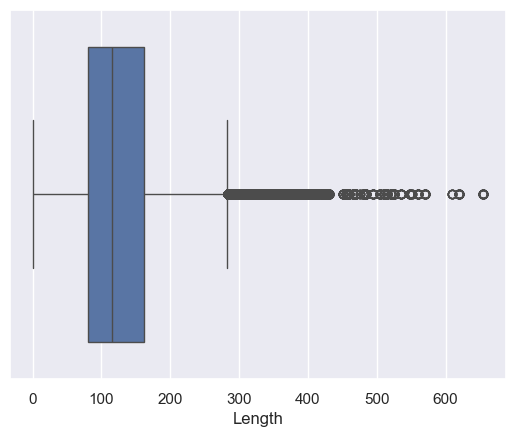

In [73]:
sns.boxplot(data=clon_df, x="Length")

In [74]:
clon_df['Length'].mean()  

np.float64(132.20200673732765)

In [75]:
clon_df['Length'].median()

np.float64(115.0)

In [76]:
clon_df['Time'].mean()

np.float64(802.7289625368245)

In [77]:
clon_df['Time'].median()

np.float64(795.0)

#### Bivariate Analysis

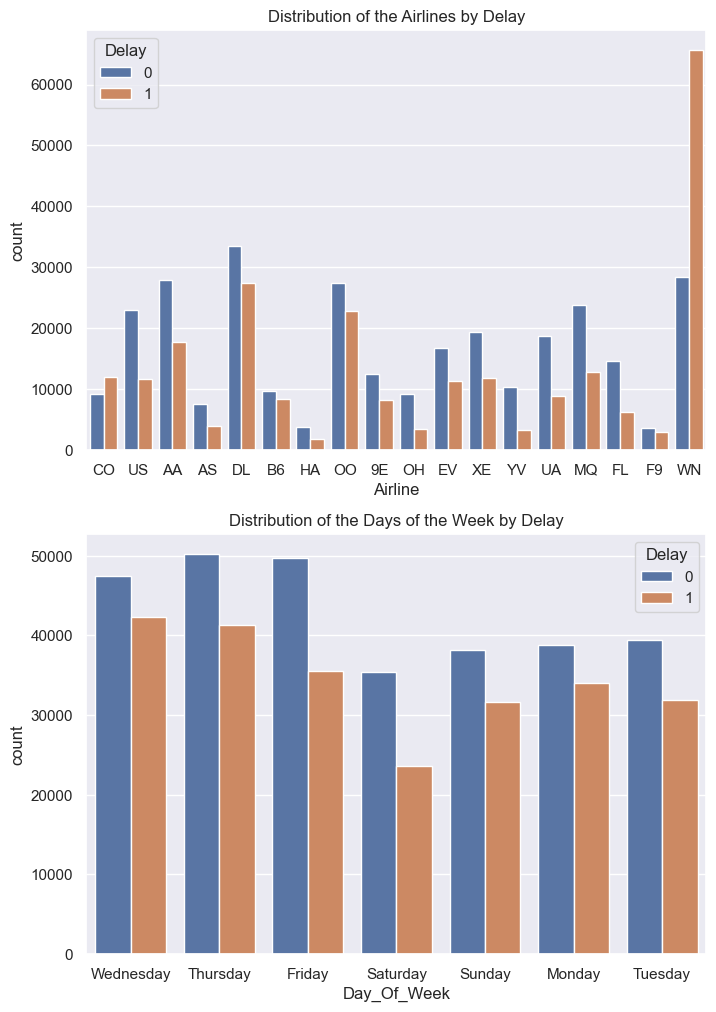

In [78]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.countplot(data=clon_df, x='Airline', hue='Delay')
plt.title("Distribution of the Airlines by Delay")

plt.subplot(2,1,2)
sns.countplot(data=clon_df, x='Day_Of_Week', hue='Delay')
plt.title("Distribution of the Days of the Week by Delay")

plt.show()

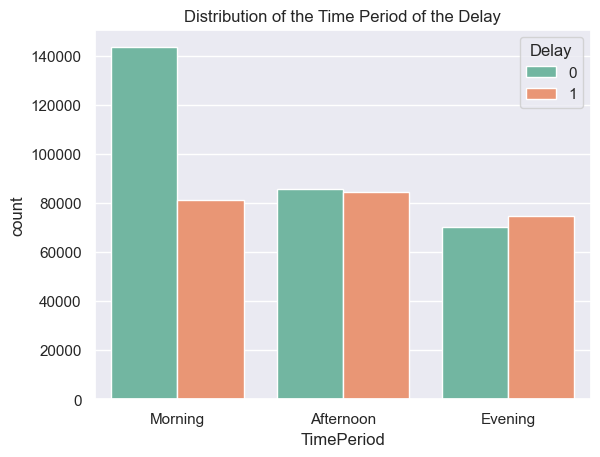

In [79]:
sns.countplot(data=clon_df, x= "TimePeriod", hue="Delay", palette="Set2")
plt.title("Distribution of the Time Period of the Delay")

plt.show()

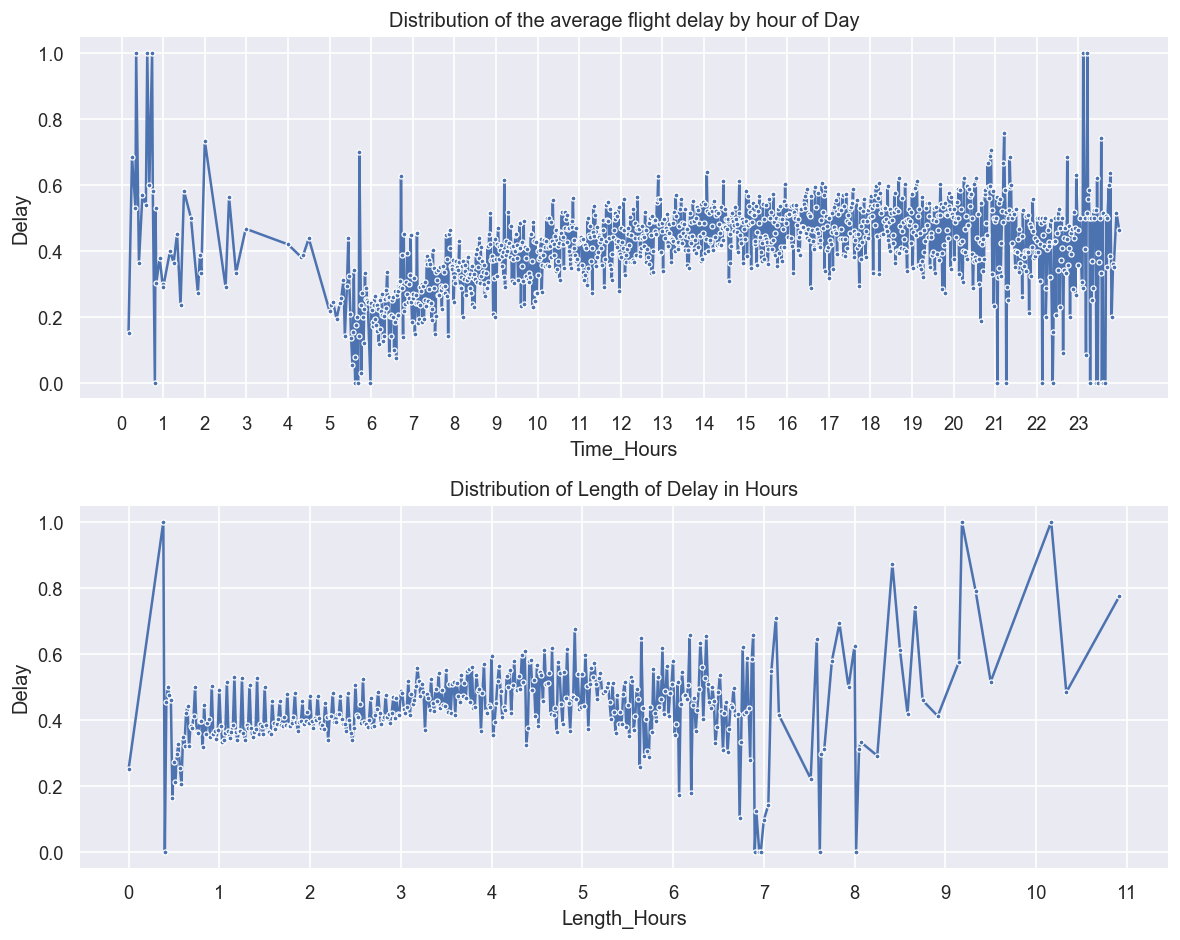

In [80]:
plt.figure(figsize=(10, 8), dpi=120)
plt.subplot(2,1,1)
avg_delay_per_hour = clon_df.groupby('Time_Hours')['Delay'].mean().reset_index()

sns.lineplot(data=avg_delay_per_hour, x='Time_Hours', y='Delay', marker= '.')
plt.xticks(range(0,24))
plt.title("Distribution of the average flight delay by hour of Day")

plt.subplot(2,1,2)
avg_delay_per_length = clon_df.groupby('Length_Hours')['Delay'].mean().reset_index()
sns.lineplot(data=avg_delay_per_length, x='Length_Hours', y='Delay', marker= '.')
plt.xticks(range(0,12))
plt.title("Distribution of Length of Delay in Hours")

plt.tight_layout()
plt.show()

In [81]:
pd.DataFrame(clon_df['Time_Hours'].value_counts())

,count
Time_Hours,
6.000000,10784
7.000000,6644
6.500000,4279
8.000000,4058
7.500000,3804
...,...
0.733333,1
0.350000,1
23.116667,1


In [82]:
pd.DataFrame(clon_df['Length_Hours'].value_counts())

,count
Length_Hours,
1.333333,13339
1.166667,13086
1.083333,11894
1.416667,11840
1.250000,11813
...,...
6.966667,2
7.616667,2
8.016667,2


#### Feature Encoding

In [83]:
clon_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,Time_Hours,Length_Hours,TimePeriod
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday,0.250000,3.416667,Morning
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday,0.250000,3.700000,Morning
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday,0.333333,2.750000,Morning
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday,0.333333,3.250000,Morning
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday,0.500000,3.366667,Morning


In [84]:
cat_cols = clon_df.select_dtypes(include=["object"]).columns.tolist()

cat_cols

['Airline', 'AirportFrom', 'AirportTo', 'Day_Of_Week', 'TimePeriod']

In [85]:
le = LabelEncoder()

for col in cat_cols:
    clon_df[col] = le.fit_transform(clon_df[col])

clon_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,Time_Hours,Length_Hours,TimePeriod
0,1,4,269,253,135,3,15,205,1,6,0.250000,3.416667,2
1,2,14,1558,217,60,3,15,222,1,6,0.250000,3.700000,2
2,3,1,2400,154,80,3,20,165,1,6,0.333333,2.750000,2
3,4,1,2466,253,80,3,20,195,1,6,0.333333,3.250000,2
4,5,2,108,14,252,3,30,202,0,6,0.500000,3.366667,2


#### Feature Selection

In [86]:
x= clon_df.drop(columns=["id"])

y = clon_df["Delay"]

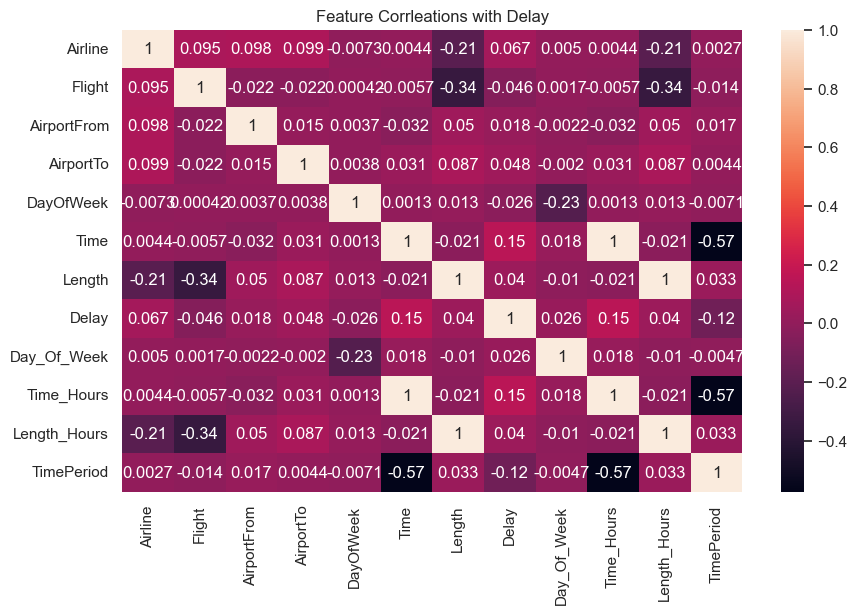

In [87]:
plt.figure(figsize=(10, 6))

sns.heatmap(x.corr(), annot=True)
plt.title("Feature Corrleations with Delay")
plt.show()

In [88]:
x = clon_df.drop(columns=["Flight", "AirportFrom", "AirportTo", "Day_Of_Week", "Length_Hours", "Time_Hours", "Time", "Delay"])

y = clon_df["Delay"]



#### Feature Scaling

In [89]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x)

scaledx

array([[-1.7320476 , -1.00530759, -0.48555175,  1.03823673,  1.058287  ],
       [-1.73204117,  0.87922247, -0.48555175,  1.2806888 ,  1.058287  ],
       [-1.73203475, -1.57066661, -0.48555175,  0.46776126,  1.058287  ],
       ...,
       [ 1.73203475, -0.25149556,  0.55901871,  1.75133106, -0.11867289],
       [ 1.73204117,  0.69076947,  0.55901871,  2.57852048, -0.11867289],
       [ 1.7320476 ,  0.87922247,  0.55901871,  2.40737784, -0.11867289]],
      shape=(539383, 5))

In [90]:
y.value_counts()

Delay
0    299119
1    240264
Name: count, dtype: int64

In [91]:
x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size=0.2, random_state=21)

In [92]:
log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

In [93]:
log_preds = log.predict(x_test)

In [94]:
accuracy_score(y_test, log_preds)

0.5895417929679172

In [95]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     59917
           1       0.56      0.38      0.45     47960

    accuracy                           0.59    107877
   macro avg       0.58      0.57      0.56    107877
weighted avg       0.58      0.59      0.57    107877



In [ ]:
forest = RandomForestClassifier(random_state=21)

forest.fit(x_train, y_train)

In [ ]:
forest_preds = forest.predict(x_test)

In [ ]:
accuracy_score(y_test, forest_preds)

0.6306812388182838

In [ ]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     59917
           1       0.59      0.54      0.57     47960

    accuracy                           0.63    107877
   macro avg       0.62      0.62      0.62    107877
weighted avg       0.63      0.63      0.63    107877



#### CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, forest_preds)

cm

array([[41978, 17939],
       [21902, 26058]])

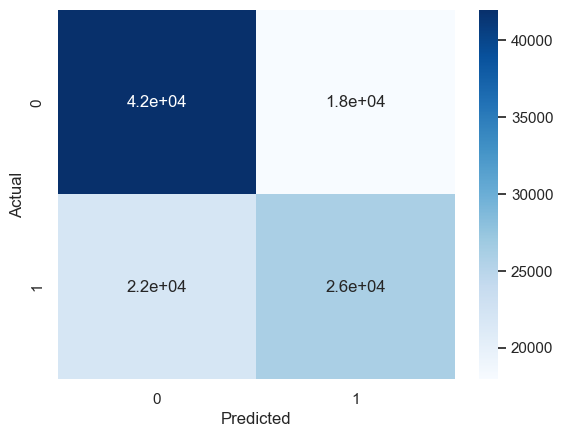

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Determining the AUC SCORE

In [ ]:

forest_prob = forest.predict_proba(x_test)[:, 1] #Probability for positive class


auc_score = roc_auc_score(y_test, forest_prob)

auc_score

np.float64(0.6758974118395056)